# Lab 1 : An Introduction

### Objectives

The main purpose of this lab will be to get us working with the tools, working as a group, and ironing out all the details in the process. The same procedure will be used for all the labs! All group members must be able to use Jupyter and submit assignments on their own.  

The main objectives for this assignment will be developing a work flow for the labs, including working with your group, submitting the lab, etc.


## Structure Overview

The labs and homeworks will be structured in a specific way.  There are text cells and code cells.
The code cells may already contain code (such as the first code cell below).  You can run this cell as provided and add code as you wish.  In addition it may also contain the code
```
# YOUR CODE HERE
raise NotImplementedError()
```
This is a placeholder that will raise an error.  You should delete these two lines and replace them with code you have written. You may also occasionally be asked to provide a text reply. In this case, you will need to edit an empty markdown cell, as below,


## Good Coding Practices

We should always explicitly load the modules we wish to use. Further, we should do this is a way that does not "pollute the namespace". We will always do that in this course!

As one example of why this is important consider the cosine function. In standard Python the cosine function is not defined. Instead we need to load it from somewhere. There are at least three places would could get it from:

1. Python math module: This only operates on single numbers. In our work we will usually want our functions to work on arrays.
2. The numpy module: This is the one we want to use and the one that gets loaded automatically in various circumstances.
3. The sympy module: This would be the one we wanted if we were doing symbolic manipulations (sadly we will not be doing so this semester).

If we were to load all the functions in each of these modules into the default name space and tried to just call the cos function which one do we get? It will depend on which one was loaded most recently! Since we do not want the behavior of our code to depend on the load order of modules or the state of our kernel we should explicitly load the module we want and use the function from that module.


### Boiler plate

At the top of all of our documents we should load all the modules we want to use. This will become standard practice in labs from now on. One thing we will always want is the numpy module. It can be loaded as

```
import numpy as np
```

The import command loads a module for us. It creates a namespace with the same name as the module. Thus to access anything defined in the module we would need to prepend it with numpy. (notice there is a 'dot' after the numpy). For example, to access the cosine function we would use numpy.cos. This is a lot of typing. Fortunately we can give it a shorter name (an alias), which is what the as phrase does for us. Here we have renamed numpy to be np so that we can access the cosine function as np.cos.

Though we can name our modules anything we want when we import them, there are some standard conventions that have evolved over the years. It is best to use the standard conventions whenever possible. Calling the numpy module np is quite standard, you will find it in almost any modern example online and is what you should always use.

### Initialization

Initialize your environment by importing all the required modules. For now just import the numpy module. In the future, there may be other modules we need. Those can be added as needed.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Defining Functions

Defining functions to perform calculations for variable inputs is an essential tool.  Here we will define a function to compute $x^a$ for arbitrary $x$ and $a$.  To begin we want our function to be created as

    def mypow(x, a) :

Complete the definition of this function by filling in the `Code` cell below.

Notes:
- Exponentiation is performed using `**`.
- Do not forget to `return` your answer from the function.
- As mentioned in Homework 1, do not forget to remove the lines
```
# YOUR CODE HERE
raise NotImplementedError()
```

In [2]:
def mypow(x, a) :
    # YOUR CODE HERE
    return (x ** a)

Now that it is defined you should test it.  Run your function and verify it correctly calculates $2^2$, $2^3$, $3^2$, and any other cases you want to try.
(You should try multiple cases, but only need to leave one of them in the cell below.)

In [3]:
# YOUR CODE HERE
print(mypow(2,5))

32


A function can have default values, that is, optional arguments that do not need to be specified when the function is called.  Suppose we *typically* want to calculate $x^2$.  In this case it would be tedious to constantly set $a$ to 2 every time we call `mypow`.  To avoid this, we can set a default value for $a$ when we define the function.  To do so below we modify the way we define the function.  Now we start with

    def mypow(x, a=2) :
    
Redefine the `mypow` function using the default value for `a`.  Afterward add a new `Code` cell below the function definition and run a few tests.  You should run tests like `mypow(2)` and `mypow(2,3)`, *etc.* to see how they behave.

Note: The code in the body of our function does **not change**.  Only how we create the function (the function signature) changes.

In [4]:
def mypow(x, a=2) :
    # YOUR CODE HERE
    return (x ** a)
print(mypow(4))
print(mypow(2,5))

16
32


The function you wrote works for more than just numbers.  We can also pass an array to it and it will do the "right thing" with no extra work required by us!  Let $x$ be an array of 10 values from 0 to 2.  Create this array and pass it to `mypow`. You should find it returns an array of the squares of all the values you passed in.

In [5]:
# YOUR CODE HERE
x = np.array([0,1,2,1,1,2,2,1,0,1])
print(mypow(x,2))
print(mypow(2,x))

[0 1 4 1 1 4 4 1 0 1]
[1 2 4 2 2 4 4 2 1 2]


This would also "magically" work if $x$ were a single number and $a$ were an array. (Feel free to test this yourself). Unfortunately, the function does not "magically" work if both $x$ and $a$ are arrays of different lengths.  (If they are the same length then the function would not produce an error.  Whether it produces something useful or not depends on your expectations!) For example, let $a$ be an array from 1 to 4 in steps of 1.  Using this $a$ and the $x$ array from the previous part try to run `mypow` and see what happens.  You should get an error.

In [6]:
# YOUR CODE HERE
x=np.array([1,2,3,4])
a=np.array([1,2,3,4])
mypow(x,a)

array([  1,   4,  27, 256], dtype=int32)

# Sensitivity to Choice of Algorithm

Mathematically equivalent equations are **not** all equally good for numerical work.  In fact, the mathematical expressions we use for defining many quantities (derivatives, integrals, *etc.*) are often very poor for numerical work.  Here we will explore this using a simple example.

## Calculation of $1/3^n$

There are many, many ways to calculate $1/3^n$.  Here we will explore two recursion relations. While a rather artificial example, this will help to demonstrate the difference a good algorithm can make!


### An aside: division and forcing floating point numbers

In Python 3 division of integers that should produce a floating point number will in fact produce a floating point number.  This may seem obvious to you, but it is **not the case in most other (older) languages** and even is not true in Python 2.  In other languages 1/4 = 0, not 0.25, since it is doing integer division and returned the closest integer by truncating the decimal places.  This behavior was changed in Python 3.

This can lead to some problems and inconsistencies.  Take for example the code below, where we compute $1/3^n$ directly for a range of $n$.

In [7]:
N = 50
n = np.arange(N+1)
result = 1/3.**n
print(result)

[1.00000000e+00 3.33333333e-01 1.11111111e-01 3.70370370e-02
 1.23456790e-02 4.11522634e-03 1.37174211e-03 4.57247371e-04
 1.52415790e-04 5.08052634e-05 1.69350878e-05 5.64502927e-06
 1.88167642e-06 6.27225474e-07 2.09075158e-07 6.96917194e-08
 2.32305731e-08 7.74352438e-09 2.58117479e-09 8.60391597e-10
 2.86797199e-10 9.55990664e-11 3.18663555e-11 1.06221185e-11
 3.54070616e-12 1.18023539e-12 3.93411796e-13 1.31137265e-13
 4.37124217e-14 1.45708072e-14 4.85693575e-15 1.61897858e-15
 5.39659528e-16 1.79886509e-16 5.99621697e-17 1.99873899e-17
 6.66246331e-18 2.22082110e-18 7.40273701e-19 2.46757900e-19
 8.22526334e-20 2.74175445e-20 9.13918149e-21 3.04639383e-21
 1.01546461e-21 3.38488203e-22 1.12829401e-22 3.76098004e-23
 1.25366001e-23 4.17886671e-24 1.39295557e-24]


Here floating point division is forced, and in fact the `3.**n` is a floating point one, due to the added decimal point. Why is this useful?  Let's check.  Suppose we did not force floating point, then we find the following.

In [8]:
1/3**n

array([ 1.00000000e+00,  3.33333333e-01,  1.11111111e-01,  3.70370370e-02,
        1.23456790e-02,  4.11522634e-03,  1.37174211e-03,  4.57247371e-04,
        1.52415790e-04,  5.08052634e-05,  1.69350878e-05,  5.64502927e-06,
        1.88167642e-06,  6.27225474e-07,  2.09075158e-07,  6.96917194e-08,
        2.32305731e-08,  7.74352438e-09,  2.58117479e-09,  8.60391597e-10,
       -1.23734368e-09,  5.34639676e-10,  7.59711850e-10, -2.88932427e-09,
       -9.63108092e-10,  8.47420189e-10, -1.32483513e-09,  4.92481146e-10,
        5.56595627e-10,  9.13290302e-10, -9.89960808e-10,  7.90798710e-10,
       -1.99467661e-09, -6.64892204e-10, -4.60739691e-09, -1.53579897e-09,
       -5.11932990e-10, -6.38906328e-10, -2.49652539e-09, -8.32175131e-10,
        1.44936590e-09,  4.83121967e-10,  5.22290094e-10,  6.90146826e-10,
        1.92552793e-08,  6.41842645e-09,  2.13947548e-09,  7.13158494e-10,
       -1.13213400e-08, -3.77377999e-09, -1.25792666e-09])

How can this be negative for large `n`?  If we compare this to `result` we see

In [9]:
result

array([1.00000000e+00, 3.33333333e-01, 1.11111111e-01, 3.70370370e-02,
       1.23456790e-02, 4.11522634e-03, 1.37174211e-03, 4.57247371e-04,
       1.52415790e-04, 5.08052634e-05, 1.69350878e-05, 5.64502927e-06,
       1.88167642e-06, 6.27225474e-07, 2.09075158e-07, 6.96917194e-08,
       2.32305731e-08, 7.74352438e-09, 2.58117479e-09, 8.60391597e-10,
       2.86797199e-10, 9.55990664e-11, 3.18663555e-11, 1.06221185e-11,
       3.54070616e-12, 1.18023539e-12, 3.93411796e-13, 1.31137265e-13,
       4.37124217e-14, 1.45708072e-14, 4.85693575e-15, 1.61897858e-15,
       5.39659528e-16, 1.79886509e-16, 5.99621697e-17, 1.99873899e-17,
       6.66246331e-18, 2.22082110e-18, 7.40273701e-19, 2.46757900e-19,
       8.22526334e-20, 2.74175445e-20, 9.13918149e-21, 3.04639383e-21,
       1.01546461e-21, 3.38488203e-22, 1.12829401e-22, 3.76098004e-23,
       1.25366001e-23, 4.17886671e-24, 1.39295557e-24])

Notice this is perfectly well behaved, even for the largest value of `n`.  What went wrong?  The problem is again the finite number of digits that can be stored.  In this case, it is the fact that an integer also only can have a finite number of digits in it, if we try to calculate "too large" an integer it overflows, becoming negative.  In other words, we "accidentally" set the sign bit.  To check this consider the following.

In [10]:
3**n[-1]

-794958903

As we see, this is a negative number, hence the problem.  If we force floating point on the other hand:

In [11]:
3.**n[-1]

7.178979876918526e+23

We see it is now positive.  It is **not exact**.  We cannot store 19 digits so this value has been truncated.

To further complicate things consider the following.

In [12]:
3**N

717897987691852588770249

This did **not overflow**.  It is positive and exact!  What is going on?  Well, there is no maximum for integers in Python 3, we can have arbitrarily large values.  So why did this not work above?  The reason is that we are using NumPy which passes off all calculations to compiled code with fixed sizes and precisions.  Since `n` is a NumPy array, we secretly forced Python to use NumPy routines for the calculation instead of its own.

Why would we want to do this?  The NumPy routines are significantly faster and more powerful.  We can operate on arrays of values and by having fixed precision the algorithms can be much more efficient.  But this does show one of the many confusing things that can happen.

#### Advice

My advice is to always be explicit.  When you mean to use floating point numbers, force floating point numbers.  We will see this show up other times when working with NumPy arrays and algorithms.  Although most of the time things will work fine if we are not careful, when it does not work it can be very difficult to debug.  We can avoid that pain by being careful from the beginning.

## Calculation of $1/3^n$

Now we are in a position to evaluate two recursion formulae for computing $1/n^3$. Mathematically, these will *exactly* calculate $1/3^n$.  We are interested in how they behave numerically.

#### $p$-Recursion Formula

Consider the following recursive algorithm:
$$ p_0 = 1, \quad p_1 = \frac{1}{3},$$
$$p_n = \frac{5}{6} p_{n-1} - \frac{1}{6} p_{n-2}, \quad \mbox{ for all }\, n\ge2.$$

###### Question:

Write a function that returns $p_n$ given $p_{n-1}$ and $p_{n-2}$. Use this function to populate an array full of $p_n$, from $n=0$ up to and including $n=50$.
You will need to create an array with 51 elements, initialize the first two values in the array by hand, and use your function to compute subsequent elements. There are many ways to accomplish this, but for now you can use a `for` loop. Inspect the first several array entries to verify your function is producing expected results.

*Hint: to print out the numbers 0 through 9, you can run this code:*
```
for i in range(0,10) :
    print(i)
```

In [13]:
# YOUR CODE HERE
def precursiveVer(pn1,pn2):
    pn = 5./6.*pn1-1./6.*pn2
    return pn
series = np.zeros(51)
series[0]=1
series[1]=1./3.
for i in range(2,51):
    series[i]=precursiveVer(series[i-1],series[i-2])
for i in range(0,51):
    print("n=%i, Value=" % (i),series[i])
print("Verified with calculator that 1/3^50 is 1.3929555691×10−24")

n=0, Value= 1.0
n=1, Value= 0.3333333333333333
n=2, Value= 0.11111111111111113
n=3, Value= 0.03703703703703706
n=4, Value= 0.0123456790123457
n=5, Value= 0.004115226337448573
n=6, Value= 0.0013717421124828611
n=7, Value= 0.0004572473708276221
n=8, Value= 0.00015241579027587494
n=9, Value= 5.080526342529212e-05
n=10, Value= 1.6935087808430943e-05
n=11, Value= 5.6450292694771e-06
n=12, Value= 1.8816764231590934e-06
n=13, Value= 6.272254743863946e-07
n=14, Value= 2.0907515812881336e-07
n=15, Value= 6.96917193762787e-08
n=16, Value= 2.3230573125430026e-08
n=17, Value= 7.743524375145238e-09
n=18, Value= 2.5811747917160273e-09
n=19, Value= 8.603915972391497e-10
n=20, Value= 2.867971990799536e-10
n=21, Value= 9.559906636010305e-11
n=22, Value= 3.186635545342695e-11
n=23, Value= 1.0622118484505285e-11
n=24, Value= 3.5407061615165808e-12
n=25, Value= 1.1802353871796034e-12
n=26, Value= 3.9341179573023945e-13
n=27, Value= 1.3113726524526568e-13
n=28, Value= 4.371242174934817e-14
n=29, Value= 1.4

#### $q$-Recursion Formula

Now consider the following recursive algorithm:
$$ q_0 = 1, \quad q_1 = \frac{1}{3},$$
$$q_n = \frac{5}{3} q_{n-1} - \frac{4}{9} q_{n-2}, \quad \mbox{ for all }\, n\ge2.$$

###### Question:

As above, write a function that returns $q_n$, but now using the above recursion formula. Again, populate an array full of $q_n$, from $n=0$ up to and including $n=50$.

In [14]:
# YOUR CODE HERE
def qrecursiveVer(qn1,qn2):
    qn = 5./3.*qn1-4./9.*qn2
    return qn
qseries = np.zeros(51)
qseries[0]=1
qseries[1]=1./3.
for i in range(2,51):
    qseries[i]=qrecursiveVer(qseries[i-1],qseries[i-2])
for i in range(0,51):
    print("n=%i, Value=" % (i),qseries[i])
print("Verified with calculator that 1/3^50 is 1.3929555691×10−24")

n=0, Value= 1.0
n=1, Value= 0.3333333333333333
n=2, Value= 0.11111111111111116
n=3, Value= 0.037037037037037146
n=4, Value= 0.012345679012345845
n=5, Value= 0.004115226337448791
n=6, Value= 0.0013717421124831656
n=7, Value= 0.00045724737082803585
n=8, Value= 0.0001524157902764307
n=9, Value= 5.0805263426035284e-05
n=10, Value= 1.6935087809422954e-05
n=11, Value= 5.645029270800354e-06
n=12, Value= 1.8816764249237226e-06
n=13, Value= 6.272254767393808e-07
n=14, Value= 2.0907516126620248e-07
n=15, Value= 6.969172355950162e-08
n=16, Value= 2.3230578703079376e-08
n=17, Value= 7.743531812020469e-09
n=18, Value= 2.5811847075543934e-09
n=19, Value= 8.604048183593369e-10
n=20, Value= 2.8681482724138675e-10
n=21, Value= 9.562257057593934e-11
n=22, Value= 3.189769440817146e-11
n=23, Value= 1.0663903757646068e-11
n=24, Value= 3.5964198591116906e-12
n=25, Value= 1.2545203173434539e-12
n=26, Value= 4.924583693005608e-13
n=27, Value= 2.6319936334828853e-13
n=28, Value= 2.197952192246761e-13
n=29, Val

## Tests

###### Question:

We also know what values should be returned, so we can compare them to the "expected" values from the `result` array computed earlier.
Compute the fractional difference between the arrays you generated, and the `result` array. Print out the entirety of the results you get.

In [15]:
# YOUR CODE HERE
qerror = (qseries-result)/result
print(qerror)
perror = (series-result)/result
print(perror)

[0.00000000e+00 0.00000000e+00 4.99600361e-16 2.99760217e-15
 1.34892097e-14 5.60645280e-14 2.27788491e-13 9.14434056e-13
 3.66182646e-12 1.46525520e-11 5.86160766e-11 2.34470258e-10
 9.37888048e-10 3.75155973e-09 1.50062472e-08 6.00249977e-08
 2.40100000e-07 9.60400009e-07 3.84160005e-06 1.53664002e-05
 6.14656008e-05 2.45862403e-04 9.83449612e-04 3.93379845e-03
 1.57351938e-02 6.29407752e-02 2.51763101e-01 1.00705240e+00
 4.02820961e+00 1.61128385e+01 6.44513538e+01 2.57805415e+02
 1.03122166e+03 4.12488664e+03 1.64995466e+04 6.59981863e+04
 2.63992745e+05 1.05597098e+06 4.22388392e+06 1.68955357e+07
 6.75821428e+07 2.70328571e+08 1.08131428e+09 4.32525714e+09
 1.73010285e+10 6.92041142e+10 2.76816457e+11 1.10726583e+12
 4.42906331e+12 1.77162532e+13 7.08650129e+13]
[0.00000000e+00 0.00000000e+00 2.49800181e-16 7.49400542e-16
 1.68615122e-15 3.16153353e-15 5.84883704e-15 9.60315811e-15
 1.54717547e-14 2.48081585e-14 3.88127640e-14 5.98696889e-14
 9.17176624e-14 1.39770965e-13 2.12315

Notice that the errors are not zero, so the values are not exact, but we do not expect them to be.  We expect them to be "close", for some definition of close.  In both cases the errors are rather small at first, but the errors for the $q$ recursion seem to be growing faster than for the $p$ recursion.  In fact, for the $q$ recursion the error becomes huge!  The recursion totally fails!  This despite the fact that both algorithms are mathematically exact.

## Plots of Errors

Looking at lists of numbers is fine, but a plot is typically easier to read. Recall homework 1, and produce a plot of the fractional error as a function of $n$. You should do several things for this plot:

1. Make the y-axis log scaled. (Hint: use `semilogy`.)
2. Add a horizontal line indicating where the fractional error is equal to 1.
3. Add a legend indicating which data are from which recursion algorithm.
4. Make sure to label your axes, and title your figure!

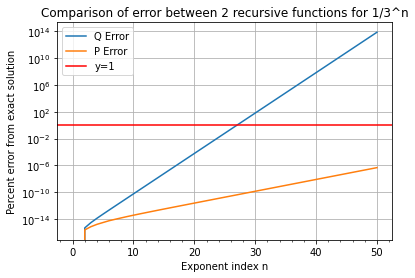

In [18]:
# YOUR CODE HERE
xaxis = range(0,51)
plt.semilogy(xaxis,qerror, label="Q Error")
plt.semilogy(xaxis,perror, label="P Error")
plt.axhline(y=1,color='r', label="y=1")
plt.title("Comparison of error between 2 recursive functions for 1/3^n")
plt.xlabel("Exponent index n")
plt.ylabel("Percent error from exact solution")
plt.legend()
plt.minorticks_on()
plt.grid()

From the plot we can clearly see that the errors in the $q$ recursion algorithm not only grow much more quickly than those from the $p$ recursion algorithm, but become absurdly large.  This algorithm is not usable for actual computations! 

## Turning in the Assignment

Once everything is completed, the assignment should be submitted by uploading it via canvas.  For a group assignment, only one member of the group needs to submit the lab.  Just make sure somebody does it!

## Member Participation

In the following cell enter the name for each student in the group who partcipated in this lab.  This is not just a list of group members, we already know who is in each group.  Participation means having taken an active role in its development through discussions, coding, *etc.*  By being included in this list you are affirming that each student is justified in claiming this lab as their work.  If there are any questions or concerns regarding this, please contact the course instructor.

In [17]:
print("Jeff Ahlers (I think my lab partner is dropping. They haven't responded to my email trying to setup a time)")

Jeff Ahlers (I think my lab partner is dropping. They haven't responded to my email trying to setup a time)
